In [11]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from common import NWSL, Fonts, Images

# Read in the data and perform preprocessing

In [2]:
# Read in the data
df = pd.read_csv("nwsl_minutes.csv", index_col=[0, 1])
idx = df.index.names
df

,,15,16,17,18,19,20,21,22,23,24,...,33,34,35,36,37,38,39,40,41,42
team,year,,,,,,,,,,,,,,,,,,,,,
LA,2022,NaN,NaN,NaN,NaN,NaN,NaN,360.0,2112.0,97.0,335.0,...,686.0,1589.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NC,2022,NaN,NaN,NaN,NaN,NaN,1359.0,251.0,2529.0,1364.0,940.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
POR,2022,NaN,650.0,58.0,NaN,NaN,NaN,870.0,1043.0,3634.0,3142.0,...,512.0,791.0,NaN,206.0,1298.0,500.0,564.0,NaN,NaN,NaN
KC,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2713.0,2488.0,2335.0,...,NaN,1075.0,2715.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CHI,2022,NaN,NaN,NaN,NaN,NaN,NaN,508.0,833.0,1444.0,9121.0,...,NaN,2624.0,1049.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WNY,2016,NaN,NaN,NaN,NaN,NaN,45.0,1628.0,4828.0,7525.0,2376.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SEA,2016,NaN,NaN,NaN,NaN,NaN,NaN,136.0,850.0,322.0,34.0,...,NaN,720.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NJ,2016,NaN,NaN,NaN,NaN,NaN,NaN,1666.0,5762.0,3611.0,1429.0,...,938.0,NaN,NaN,NaN,NaN,NaN,NaN,810.0,990.0,NaN


In [3]:
# Group together teams that are the same
df.index = pd.MultiIndex.from_tuples(
    [
        (
            re.sub("NJ$", "NJY", x[0])
            .replace("SEA", "RGN")
            .replace("UTA", "KC")
            .replace("WNY", "NC"),
            x[1],
        )
        for x in df.index
    ]
)
df.index.names = idx

In [4]:
# Group together years that are the same
df.index = pd.MultiIndex.from_tuples(
    [(x[0], int(re.search(r'\d+', x[1]).group())) for x in df.index]
)
df = df.groupby(level=[0, 1]).sum()
df

15   16   17     18      19      20      21      22      23  \
BOS 2016  0.0  0.0  0.0    0.0     0.0     0.0   100.0  1464.0  2350.0   
    2017  0.0  0.0  0.0    0.0     0.0     0.0  1559.0  1626.0  4395.0   
CHI 2016  0.0  0.0  0.0    0.0     0.0     0.0     0.0  1654.0  6942.0   
    2017  0.0  0.0  0.0    0.0     0.0     0.0   134.0   327.0  2772.0   
    2018  0.0  0.0  0.0    0.0     0.0     0.0    90.0   521.0   485.0   
...       ...  ...  ...    ...     ...     ...     ...     ...     ...   
WAS 2018  0.0  0.0  0.0    0.0   435.0   647.0   167.0  5330.0  2514.0   
    2019  0.0  0.0  0.0    0.0     0.0   180.0   932.0  5769.0  3858.0   
    2020  0.0  0.0  0.0    0.0     0.0     0.0   670.0   848.0  2756.0   
    2021  0.0  0.0  0.0  391.0  1608.0     0.0   912.0  3975.0  1298.0   
    2022  0.0  0.0  0.0    0.0   972.0  1234.0     0.0   717.0  8464.0   

              24  ...     33     34     35     36   37   38   39   40   41  \
BOS 2016  5343.0  ...    0.0    0.0    0.0    0.0  0.0  0.0  0.0  0.0  0.0   
    2017  5899.0  ...  804.0    0.0    0.0    0.0  0.0  0.0  0.0  0.0  0.0   
CHI 2016  3740.0  ...    0.0    0.0    0.0    0.0  0.0  0.0  0.0  0.0  0.0   
    2017  6460.0  ...    0.0    0.0    0.0    0.0  0.0  0.0  0.0  0.0  0.0   
    2018  6049.0  ...    0.0    0.0    0.0    0.0  0.0  0.0  0.0  0.0  0.0   
...          ...  ...    ...    ...    ...    ...  ...  ...  ...  ...  ...   
WAS 2018  5690.0  ...    0.0   84.0  306.0  123.0  0.0  0.0  0.0  0.0  0.0   
    2019  4006.0  ...    0.0    0.0    0.0    0.0  0.0  0.0  0.0  0.0  0.0   
    2020   611.0  ...    0.0    0.0    0.0    0.0  0.0  0.0  0.0  0.0  0.0   
    2021  4230.0  ...  983.0    0.0    0.0    0.0  0.0  0.0  0.0  0.0  0.0   
    2022  1111.0  ...  769.0  180.0    0.0    0.0  0.0  0.0  0.0  0.0  0.0   

           42  
BOS 2016  0.0  
    2017  0.0  
CHI 2016  0.0  
    2017  0.0  
    2018  0.0  
...       ...  
WAS 2018  0.0  
    2019  0.0  
    2020  0.0  
    2021  0.0  
    2022  0.0  

[69 rows x 28 columns]

# Add columns summing up ranges

In [5]:
# Calculate what proportion of the whole each value is
rates = df.div(df.sum(axis=1), axis=0)
rates

15   16   17        18        19        20        21        22  \
BOS 2016  0.0  0.0  0.0  0.000000  0.000000  0.000000  0.005051  0.073947   
    2017  0.0  0.0  0.0  0.000000  0.000000  0.000000  0.065617  0.068437   
CHI 2016  0.0  0.0  0.0  0.000000  0.000000  0.000000  0.000000  0.078314   
    2017  0.0  0.0  0.0  0.000000  0.000000  0.000000  0.005640  0.013763   
    2018  0.0  0.0  0.0  0.000000  0.000000  0.000000  0.003636  0.021051   
...       ...  ...  ...       ...       ...       ...       ...       ...   
WAS 2018  0.0  0.0  0.0  0.000000  0.018308  0.027231  0.007029  0.224327   
    2019  0.0  0.0  0.0  0.000000  0.000000  0.007597  0.039335  0.243479   
    2020  0.0  0.0  0.0  0.000000  0.000000  0.000000  0.075196  0.095174   
    2021  0.0  0.0  0.0  0.015439  0.063492  0.000000  0.036010  0.156953   
    2022  0.0  0.0  0.0  0.000000  0.033478  0.042502  0.000000  0.024695   

                23        24  ...        33        34        35        36  \
BOS 2016  0.118699  0.269876  ...  0.000000  0.000000  0.000000  0.000000   
    2017  0.184983  0.248285  ...  0.033840  0.000000  0.000000  0.000000   
CHI 2016  0.328693  0.177083  ...  0.000000  0.000000  0.000000  0.000000   
    2017  0.116672  0.271897  ...  0.000000  0.000000  0.000000  0.000000   
    2018  0.019596  0.244404  ...  0.000000  0.000000  0.000000  0.000000   
...            ...       ...  ...       ...       ...       ...       ...   
WAS 2018  0.105808  0.239478  ...  0.000000  0.003535  0.012879  0.005177   
    2019  0.162826  0.169072  ...  0.000000  0.000000  0.000000  0.000000   
    2020  0.309315  0.068575  ...  0.000000  0.000000  0.000000  0.000000   
    2021  0.051252  0.167022  ...  0.038814  0.000000  0.000000  0.000000   
    2022  0.291520  0.038265  ...  0.026486  0.006200  0.000000  0.000000   

           37   38   39   40   41   42  
BOS 2016  0.0  0.0  0.0  0.0  0.0  0.0  
    2017  0.0  0.0  0.0  0.0  0.0  0.0  
CHI 2016  0.0  0.0  0.0  0.0  0.0  0.0  
    2017  0.0  0.0  0.0  0.0  0.0  0.0  
    2018  0.0  0.0  0.0  0.0  0.0  0.0  
...       ...  ...  ...  ...  ...  ...  
WAS 2018  0.0  0.0  0.0  0.0  0.0  0.0  
    2019  0.0  0.0  0.0  0.0  0.0  0.0  
    2020  0.0  0.0  0.0  0.0  0.0  0.0  
    2021  0.0  0.0  0.0  0.0  0.0  0.0  
    2022  0.0  0.0  0.0  0.0  0.0  0.0  

[69 rows x 28 columns]

In [16]:
# These are inclusive ranges
ranges = [(15, 24), (25, 29), (30, 42)]
for (low, high) in ranges:
    rates[str(low) + "-" + str(high)] = rates[list(map(str, range(low, high + 1)))].sum(axis=1)
rates

15   16   17        18        19        20        21        22  \
BOS 2016  0.0  0.0  0.0  0.000000  0.000000  0.000000  0.005051  0.073947   
    2017  0.0  0.0  0.0  0.000000  0.000000  0.000000  0.065617  0.068437   
CHI 2016  0.0  0.0  0.0  0.000000  0.000000  0.000000  0.000000  0.078314   
    2017  0.0  0.0  0.0  0.000000  0.000000  0.000000  0.005640  0.013763   
    2018  0.0  0.0  0.0  0.000000  0.000000  0.000000  0.003636  0.021051   
...       ...  ...  ...       ...       ...       ...       ...       ...   
WAS 2018  0.0  0.0  0.0  0.000000  0.018308  0.027231  0.007029  0.224327   
    2019  0.0  0.0  0.0  0.000000  0.000000  0.007597  0.039335  0.243479   
    2020  0.0  0.0  0.0  0.000000  0.000000  0.000000  0.075196  0.095174   
    2021  0.0  0.0  0.0  0.015439  0.063492  0.000000  0.036010  0.156953   
    2022  0.0  0.0  0.0  0.000000  0.033478  0.042502  0.000000  0.024695   

                23        24  ...   40   41   42     15-24     25-27  \
BOS 2016  0.118699  0.269876  ...  0.0  0.0  0.0  0.467572  0.377058   
    2017  0.184983  0.248285  ...  0.0  0.0  0.0  0.567322  0.170883   
CHI 2016  0.328693  0.177083  ...  0.0  0.0  0.0  0.584091  0.359091   
    2017  0.116672  0.271897  ...  0.0  0.0  0.0  0.407972  0.387516   
    2018  0.019596  0.244404  ...  0.0  0.0  0.0  0.288687  0.479273   
...            ...       ...  ...  ...  ...  ...       ...       ...   
WAS 2018  0.105808  0.239478  ...  0.0  0.0  0.0  0.622180  0.214057   
    2019  0.162826  0.169072  ...  0.0  0.0  0.0  0.622309  0.279775   
    2020  0.309315  0.068575  ...  0.0  0.0  0.0  0.548260  0.322671   
    2021  0.051252  0.167022  ...  0.0  0.0  0.0  0.490168  0.266288   
    2022  0.291520  0.038265  ...  0.0  0.0  0.0  0.430461  0.305883   

             28-42     25-28     29-42     25-29     30-42  
BOS 2016  0.155369  0.498535  0.033892  0.532428  0.000000  
    2017  0.261796  0.336925  0.095753  0.398838  0.033840  
CHI 2016  0.056818  0.415909  0.000000  0.415909  0.000000  
    2017  0.204512  0.499895  0.092134  0.579444  0.012585  
    2018  0.232040  0.536606  0.174707  0.573657  0.137657  
...            ...       ...       ...       ...       ...  
WAS 2018  0.163763  0.276684  0.101136  0.333502  0.044318  
    2019  0.097915  0.287119  0.090571  0.362497  0.015194  
    2020  0.129068  0.413580  0.038159  0.413580  0.038159  
    2021  0.243544  0.271737  0.238095  0.390508  0.119324  
    2022  0.263656  0.349693  0.219846  0.349693  0.219846  

[69 rows x 35 columns]

# Visualize the plots

In [17]:
# Set up constants for the plot
teams = ["RGN", "POR", "SD", "HOU", "KC", "CHI", "NC", "LA", "LOU", "ORL", "WAS", "NJY"]
# Three colors for the lines
metrics = [
    ("15-24", "#B7489F"),
    ("25-29", "#9FB748"),
    ("30-42", "#489FB7")
]
metrics_dict = dict(metrics)

<Figure size 1728x972 with 0 Axes>

<Figure size 28800x16200 with 0 Axes>

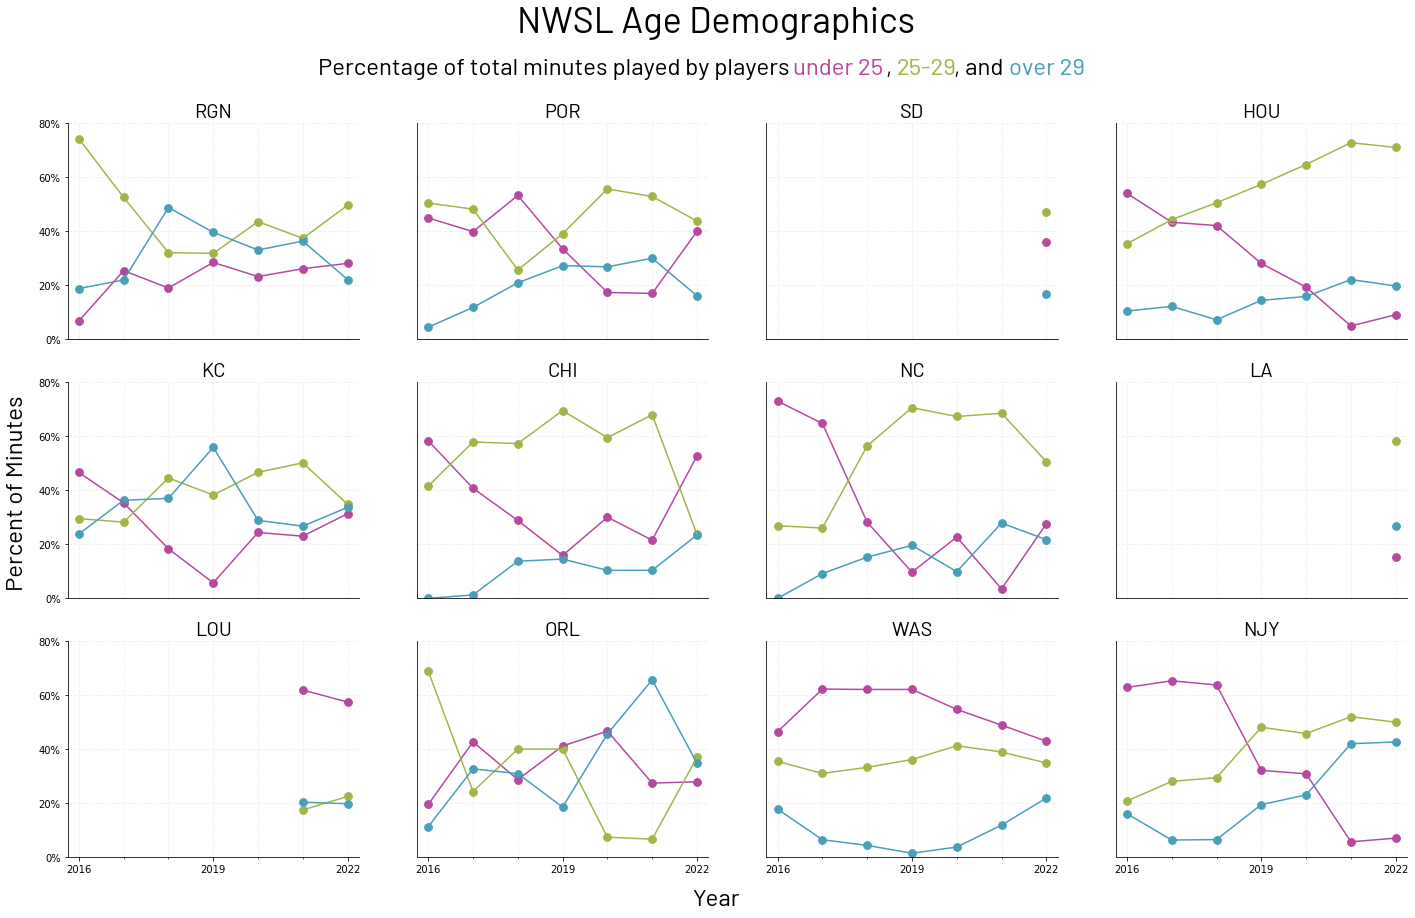

In [23]:
# General setup
plt.clf()
plt.rcParams["figure.figsize"] = (24, 13.5)
plt.figure(dpi=1200, facecolor="white")
fig, axs = plt.subplots(3, 4)
fig.patch.set_facecolor("white")

for i, team in enumerate(teams):
    ax = axs[int(i / 4), i % 4]

    # Set title
    ax.set_title(team, fontproperties=Fonts.BARLOW, size=20)

    # Handle axes and ticks
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
    ax.set_ylim([0, 0.8])
    ax.set_yticks([0, 0.2, 0.4, 0.6, 0.8])
    if i % 4 != 0:
        ax.yaxis.set_ticklabels([])
        ax.yaxis.set_ticks_position('none')
        
    ax.set_xlim([2016 - 0.25, 2022 + 0.25])
    ax.set_xticks([2016, 2019, 2022])
    ax.set_xticks(range(2016, 2022 + 1), minor=True)

    if int(i / 4) == 2:
        ax.xaxis.set_ticklabels([2016, 2019, 2022])
    else:
        ax.xaxis.set_ticklabels([])
        ax.xaxis.set_ticks_position('none')
        
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    
    # Add gridlines
    ax.set_axisbelow(True)
    ax.grid(which="both", ls="--", color="#F1F1F1", linewidth=1)

    # Plot the data
    for (metric, color) in metrics:
        ax.plot(rates.loc[team].index, rates.loc[team][metric], color)
        ax.scatter(rates.loc[team].index, rates.loc[team][metric], c=color, s=60)

fig.supxlabel("Year", y=0.07, fontproperties=Fonts.BARLOW, size=24)
fig.supylabel("Percent of Minutes", x=0.09, fontproperties=Fonts.BARLOW, size=24)

plt.suptitle("NWSL Age Demographics", y=1.0, fontproperties=Fonts.BARLOW, fontsize=36)
fig_y = 0.93
x_off = 0.07
plt.figtext(
    x_off + 0.2,
    fig_y,
    "Percentage of total minutes played by players",
    fontproperties=Fonts.BARLOW,
    fontsize=24,
)
plt.figtext(
    x_off + 0.475,
    fig_y,
    "under 25",
    fontproperties=Fonts.BARLOW,
    fontsize=24,
    color=metrics_dict["15-24"],
)
plt.figtext(x_off + 0.528, fig_y, ",", fontproperties=Fonts.BARLOW, fontsize=24)
plt.figtext(
    x_off + 0.535,
    fig_y,
    "25-29",
    fontproperties=Fonts.BARLOW,
    fontsize=24,
    color=metrics_dict["25-29"],
)
plt.figtext(x_off + 0.568, fig_y, ", and", fontproperties=Fonts.BARLOW, fontsize=24)
plt.figtext(
    x_off + 0.6,
    fig_y,
    "over 29",
    fontproperties=Fonts.BARLOW,
    fontsize=24,
    color=metrics_dict["30-42"],
)

# Save image
plt.savefig("age_demographics2.png", bbox_inches="tight", pad_inches=0.5)